In [38]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt


## Importing data set

The data frame has been cleaned and edited such that all categorical data has been changed into numerical values. This is so that the models can inerpret it and use it to make predictions.

In [39]:
df = pd.read_csv("my_full_data.csv")

In [40]:
df

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,0,68387134,2500.0,0,17.27,89.47,3,1,1,50000.0,...,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,1,66615254,7200.0,0,17.27,257.67,3,9,4,20000.0,...,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,2,68376899,16000.0,0,10.78,522.16,1,5,5,63000.0,...,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,3,68366850,16000.0,0,5.32,481.84,0,8,1,96000.0,...,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,4,67195202,13000.0,1,16.59,320.23,3,10,5,40000.0,...,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,26113,90441274,12000.0,0,13.99,410.08,2,0,5,47000.0,...,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,26114,90404436,25000.0,1,25.69,743.94,5,6,1,70000.0,...,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,26115,90393111,16000.0,0,12.79,537.49,2,1,4,48000.0,...,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,26116,90304259,35000.0,1,15.59,843.53,2,1,1,180000.0,...,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


## Prepping for model building
The data set is split into training and test data sets. The original dataset had to be separated into the X matrix and y column.

In [41]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Base model
Build the basic decision tree model using `sklearn` package. This base model takes the training data and fits it to a tree with all the default parameters.  

In [43]:
DT = DecisionTreeClassifier()

In [44]:
DT = DT.fit(X_train, y_train)

In [45]:
y_hat = DT.predict(X_test)

## Measuring Performance
Now define a function to calculate difference metrics that indicate how well the model is performing, and run the base model decision tree through it.

In [46]:
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [47]:
cal_accuracy(y_test, y_hat)

Accuracy :  85.08422664624808
Report :                precision    recall  f1-score   support

           0       0.66      0.66      0.66      1436
           1       0.90      0.90      0.90      5094

    accuracy                           0.85      6530
   macro avg       0.78      0.78      0.78      6530
weighted avg       0.85      0.85      0.85      6530



We now caluclate the accuracy scores as well some other metrics to measure the model's performance. We can see hat the accuracy score for the basic tree is 86%. This alone is not good enough to determine how well the model is performing as we are not using a balanced data set.

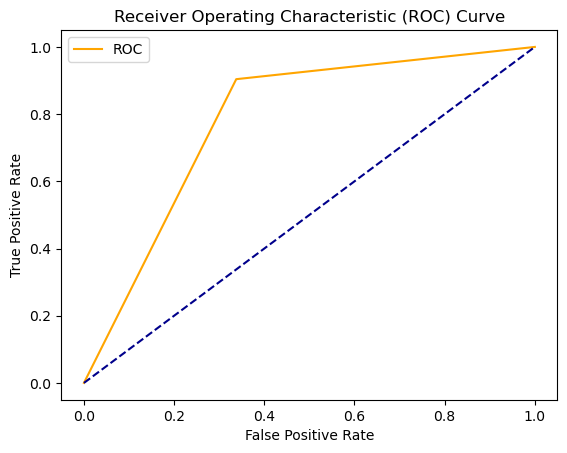

In [48]:
# printing an ROC curve

# Calculate true positive rate and false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Parameter Tuning
We now use a grid-search to find the parameter settings that will give the optimum results.

In [49]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV


In [ ]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'splitter':['best','random'],
             'min_samples_split':[2,4,6,7],
             'min_samples_leaf':[1],
             'max_features':['sqrt',5,10,15,20]
             
            }
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=8, verbose = 0)
clf.fit(X_train, y_train)
clf.best_params_

We see from the code above that the best parameters according the grid search are:
* criterion: gini
* max_depth: 4
* splitter: best
* min_samples_split: 4
* min_samples_leaf: 1
* max_features: 20

We now make a decision tree based off of this parameter tuning.


In [50]:
DT1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best', min_samples_split = 4, min_samples_leaf = 1, max_features = 20)

In [51]:
DT1 = DT1.fit(X_train, y_train)

In [52]:
y1_hat = DT1.predict(X_test)

## Measure performance


In [53]:
cal_accuracy(y_test, y1_hat)

Accuracy :  89.61715160796324
Report :                precision    recall  f1-score   support

           0       0.81      0.68      0.74      1436
           1       0.91      0.96      0.93      5094

    accuracy                           0.90      6530
   macro avg       0.86      0.82      0.84      6530
weighted avg       0.89      0.90      0.89      6530



We see here that the accuracy has only increased to 89.6%, which is an improvement of about 3.6%. This is surprisingly small so we may need to look at the other performanc emetrics to properly understand what is going on.

## Compare models on ROC curve

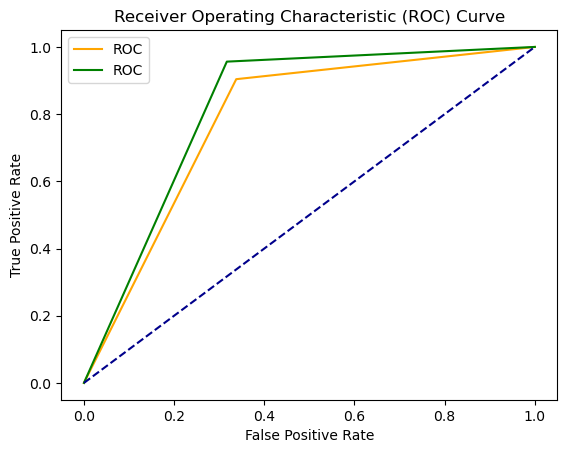

In [54]:
# printing an ROC curve

# Calculate true positive rate and false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y1_hat)
# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot(fpr1, tpr1, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

We see from the ROC curve that the newer model performs better as expected. We can also see that our new model (1) is above the baseline model the whole way, which suggests that it doesn't matter what threshold we want to use, model 1 is always the better choice.

## Confusion Matrix

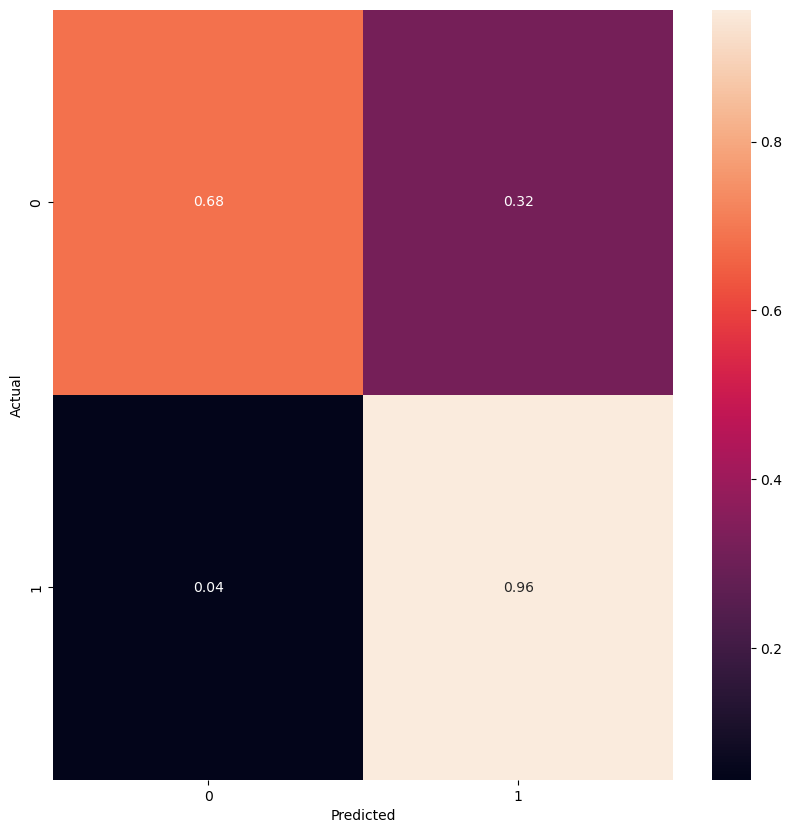

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y1_hat)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

From the confusion matrix we can see that the majority of positives are successfully identified, however there is a lower success rate in identifying the negatives. This may indicate that the data set is overly unbalanced. We may want to look at training the model on a more balanced data set.

## Balancing data set

We start by looking at what proportion of loans in the data set are not paid back (this is the thing we are trying to identify).

In [56]:
num_not_paid = (len(df.loan_status)-sum(df.loan_status))

(num_not_paid/len(df.loan_status))*100

21.295658166781532

We see that only around 21% of the loans are not paid back, therefore if we were to just always assume they were going to be paid back we would be right 80% of the time. Our best model only has an accuracy rate of 89%, this isn't much better than guessing all loans are paid back. We want to see if we can improve this at all by starting with a more balanced data set.

In [57]:
df0 = df[df['loan_status'] == 0] # data set of unpaid loans
df1 = df[df['loan_status'] == 1] # data set of paid loans


In [58]:
new_length = len(df0)


In [59]:
df1 = df1.iloc[:new_length] # makes df1 the same length as df 0 

In [60]:
df1 = df1._append(df0) # Combines the two dataframes


Now that we have a balanced data set `df1`, we fit a decision tree onto this data instead. We need to split the data frame into test and train sets again.

In [61]:
X_bal = df1.drop('loan_status', axis=1)
y_bal = df1['loan_status']

X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42)

## Making new tree

In [62]:
DT2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best', min_samples_split = 4, min_samples_leaf = 1, max_features = 20)

DT2 = DT2.fit(X_bal_train, y_bal_train)

y2_hat = DT2.predict(X_bal_test)


## Measure new performance
We now perform more performance metrics to see if there is any improvment.


In [63]:
cal_accuracy(y_bal_test, y2_hat)

Accuracy :  93.56346637900036
Report :                precision    recall  f1-score   support

           0       0.93      0.95      0.94      1392
           1       0.94      0.93      0.93      1389

    accuracy                           0.94      2781
   macro avg       0.94      0.94      0.94      2781
weighted avg       0.94      0.94      0.94      2781



It looks like we have a hige improvement. Now time to print the confusion matrix

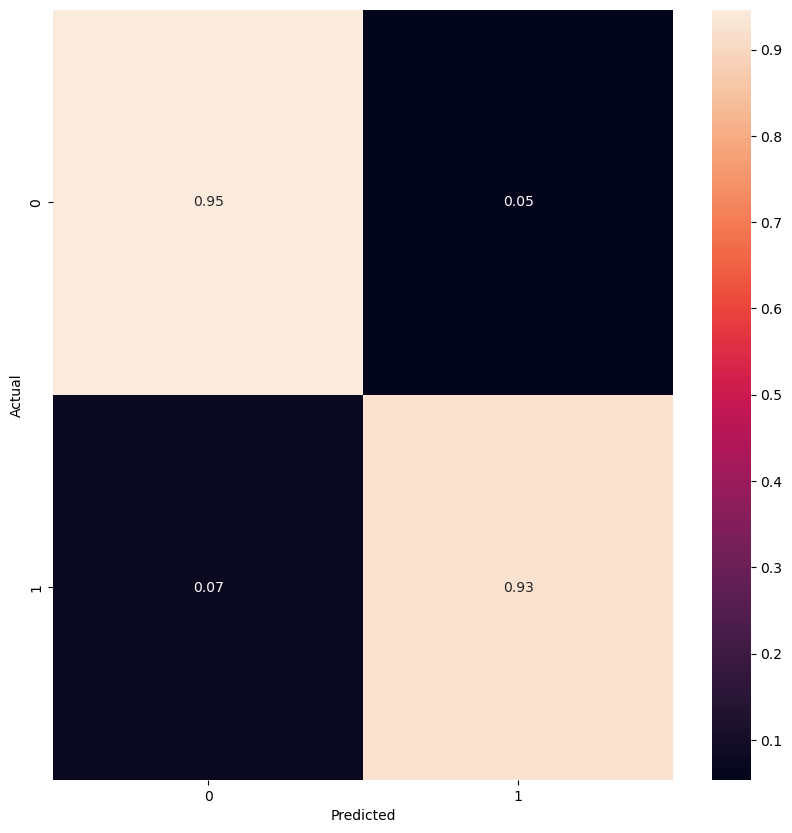

In [64]:
cm2 = confusion_matrix(y_bal_test, y2_hat)
# Normalise
cmn2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn2, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

Again, the confusion matrix is looking a lot better. Finally let's see what happens when we run some unbalanced data throught the model. Will it retain this high performance?

## Testing on unbalanced data

In [65]:
y3_hat = DT2.predict(X_test)
cal_accuracy(y_test, y3_hat)

Accuracy :  40.24502297090352
Report :                precision    recall  f1-score   support

           0       0.26      0.94      0.41      1436
           1       0.94      0.25      0.40      5094

    accuracy                           0.40      6530
   macro avg       0.60      0.60      0.40      6530
weighted avg       0.79      0.40      0.40      6530



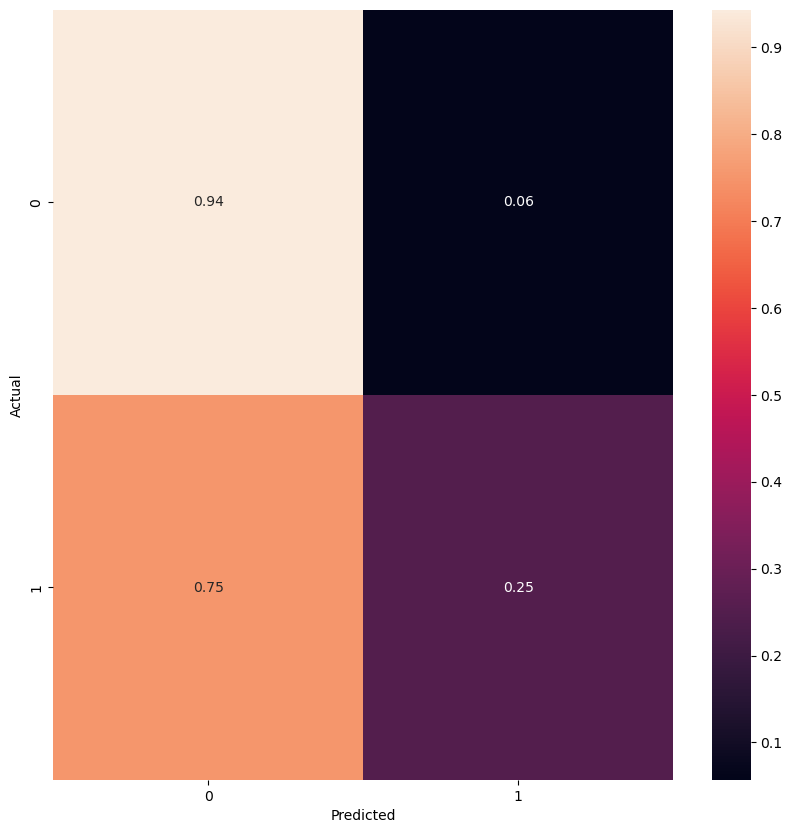

In [66]:
cm3 = confusion_matrix(y_test, y3_hat)
# Normalise
cmn3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn3, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

It now looks like this new model is assuming nearly all of the loans are unpaid. This is the opposite problem of what we had last time. HOwever, at this stage we may want to consider how risk-averse the user of this model is going to be. Although it is quite rare that the model will decide on a good investment it is even less likely that the model will be wrong when the it says a loan will be paid back. (Only 6% false positives)

## Comparing all three models

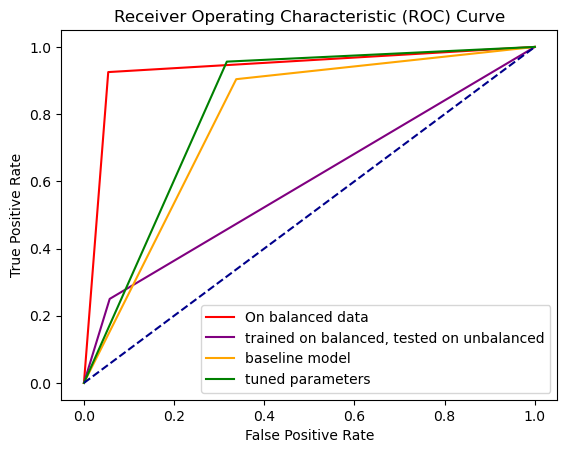

In [85]:
# printing an ROC curve

# Calculate true positive rate and false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)
fpr2, tpr2, _ = metrics.roc_curve(y_bal_test, y2_hat)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y3_hat)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y1_hat)
# Plot the ROC curve
plt.plot(fpr2, tpr2, color='red', label='On balanced data')
plt.plot(fpr3, tpr3, color='purple', label='trained on balanced, tested on unbalanced')
plt.plot(fpr, tpr, color='orange', label='baseline model')
plt.plot(fpr1, tpr1, color='green', label='tuned parameters')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## More approaches
After some research, multiple sources suggest that instead of training on a balanced dataset, you should try playing around with the weighting parameter. We will look at using the `class_weight` parameter. We keep the rest of the parameter values from the previous tuned model.

In [68]:
DT4 = DecisionTreeClassifier(class_weight = {0:2,1:8},criterion = 'gini', max_depth = 4, splitter = 'best', min_samples_split = 4, min_samples_leaf = 1, max_features = 20)

DT4 = DT4.fit(X_train, y_train)

y4_hat = DT4.predict(X_test)

In [69]:
cal_accuracy(y_test, y4_hat)

Accuracy :  86.40122511485451
Report :                precision    recall  f1-score   support

           0       0.91      0.42      0.58      1436
           1       0.86      0.99      0.92      5094

    accuracy                           0.86      6530
   macro avg       0.88      0.71      0.75      6530
weighted avg       0.87      0.86      0.84      6530



Seems that changing the class weighting won't improve our results from the intial tuned model.

## Final Performance Analysis

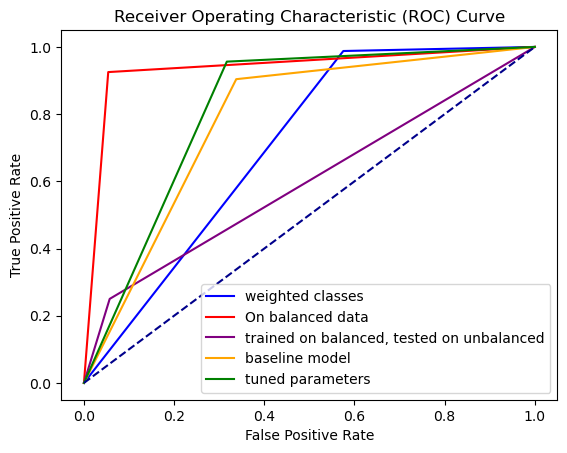

In [70]:
# ROC Curve

# Calculate true positive rate and false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)
fpr2, tpr2, _ = metrics.roc_curve(y_bal_test, y2_hat)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y3_hat)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y1_hat)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y4_hat)

# Plot the ROC curve
plt.plot(fpr4, tpr4, color='blue', label='weighted classes')
plt.plot(fpr2, tpr2, color='red', label='On balanced data')
plt.plot(fpr3, tpr3, color='purple', label='trained on balanced, tested on unbalanced')
plt.plot(fpr, tpr, color='orange', label='baseline model')
plt.plot(fpr1, tpr1, color='green', label='tuned parameters')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

From the ROC curves, ignoring the one tested on a balanced dataset, the model with the tuned parameters performed the best. However we need to think about the context in which we want our model to perform. At the point where the false positive rate is around 0.5, the model with weighted classes actually has a higher true positive rate. So we need to decide if we would prefer to identify all the positives and risk having more false positives in our prediction, or focus on getting a beter split overall, but sacrifice getting as many of the positives as possible. I think for our contect, we want to be able to identify the negative values more than the positives, as this is when we identify a case that a loan probably won't be paid back. Therefore, out of the models developed in this notebook, we prefer the model with tuned parameters (green). This tree is printed below.


## Final decision tree model:


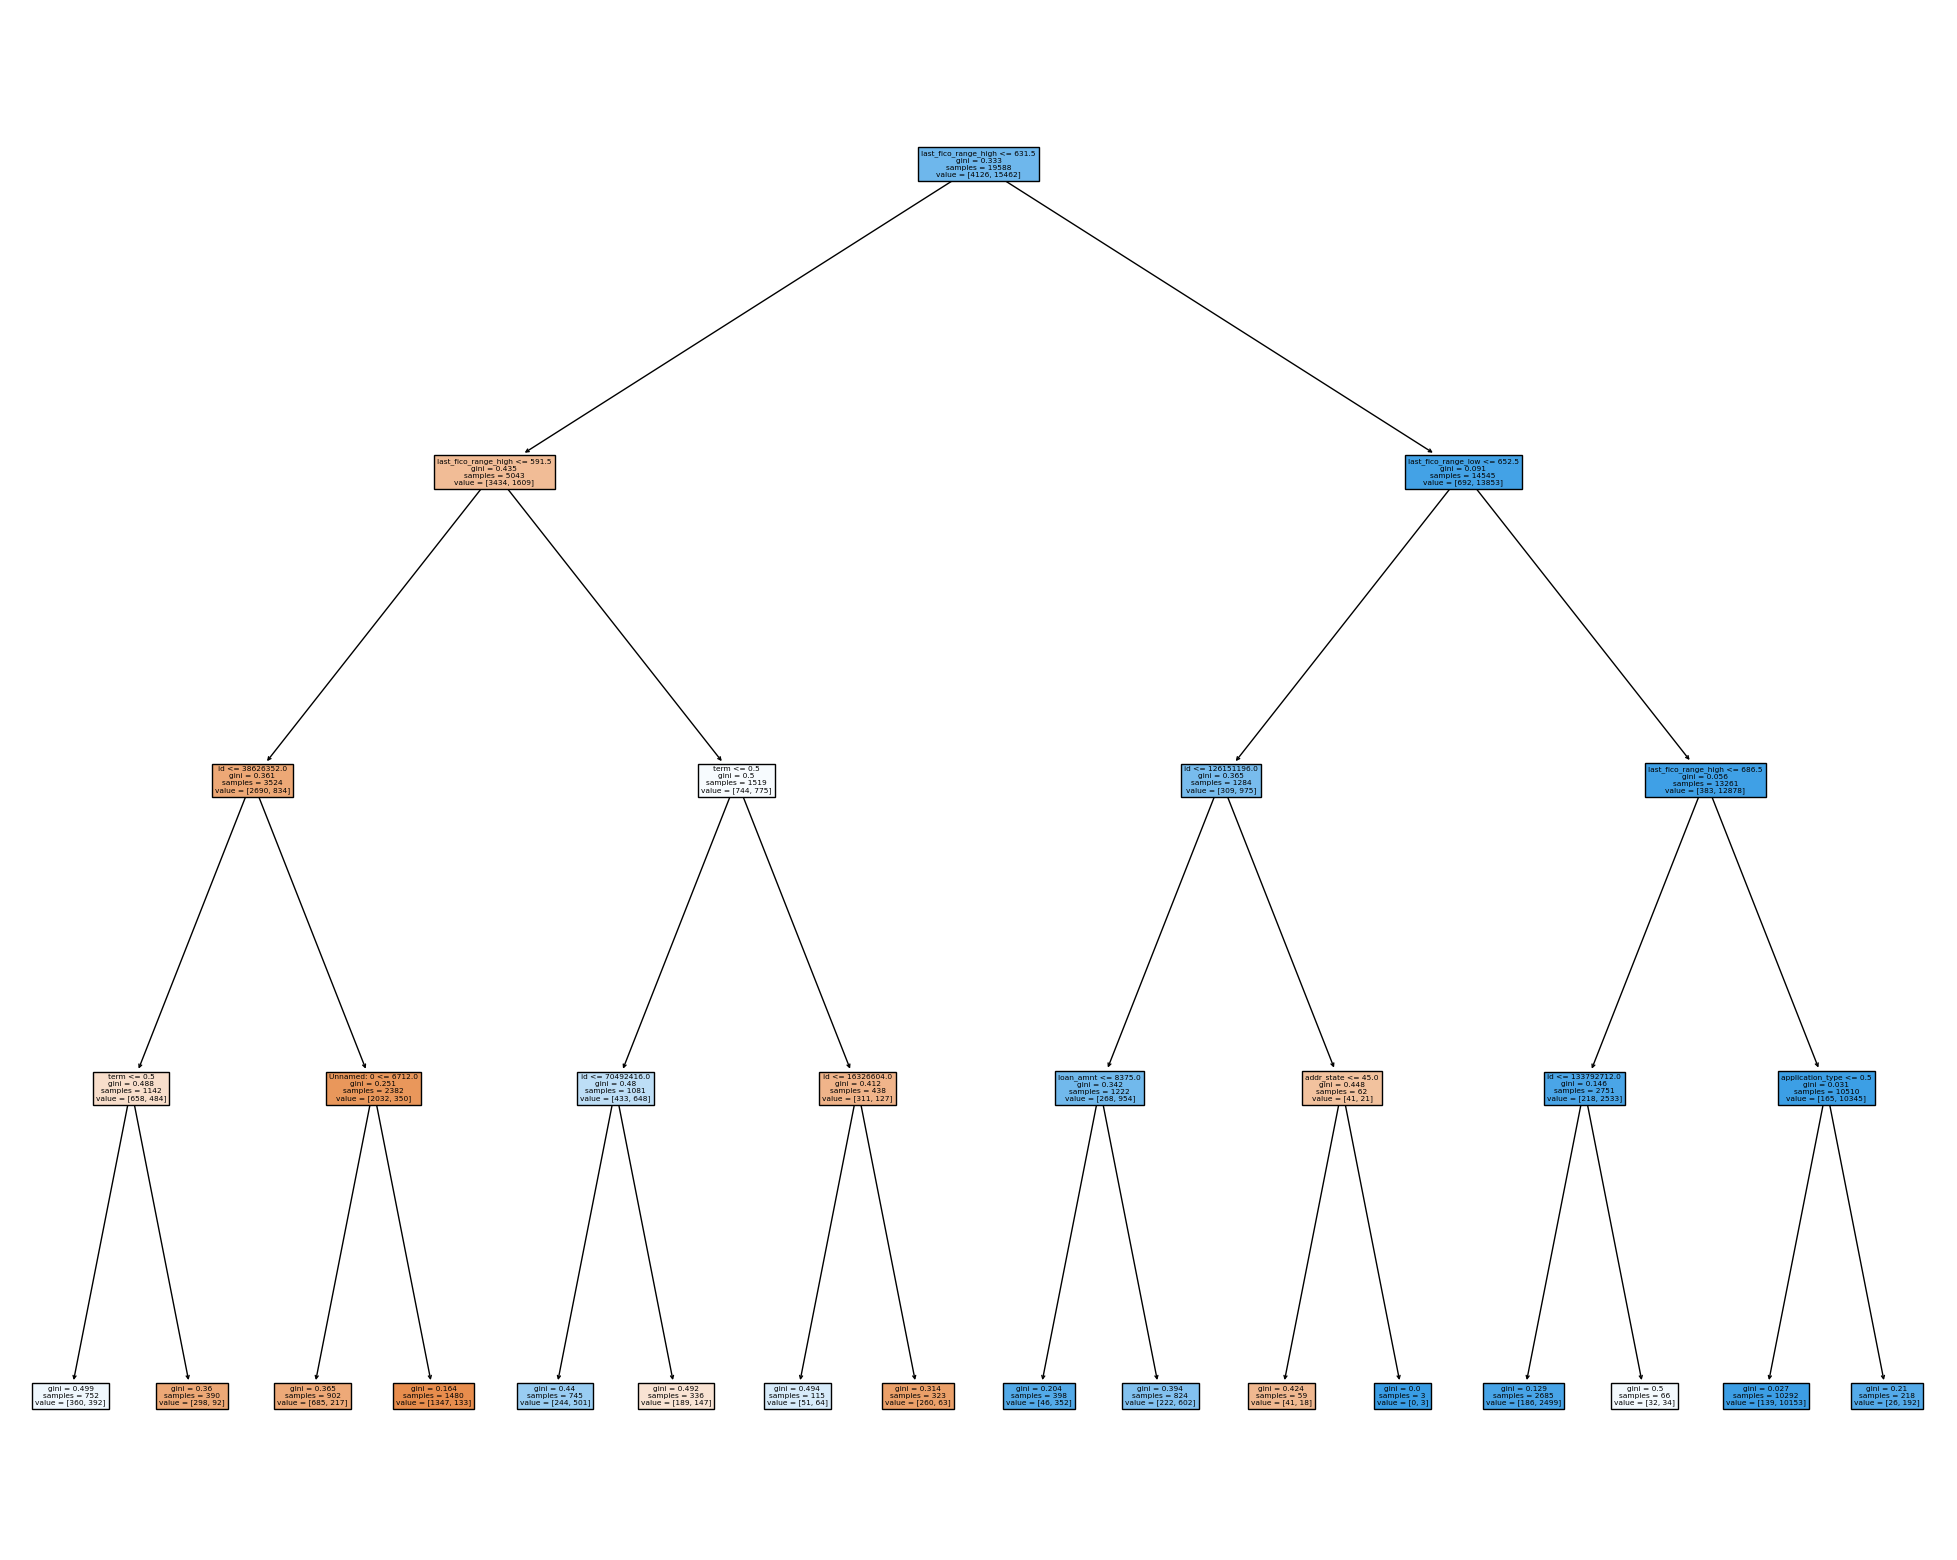

In [71]:
from sklearn import tree
names = X.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT1,
                   feature_names=names,
                   filled=True)

## Looking at feature importance

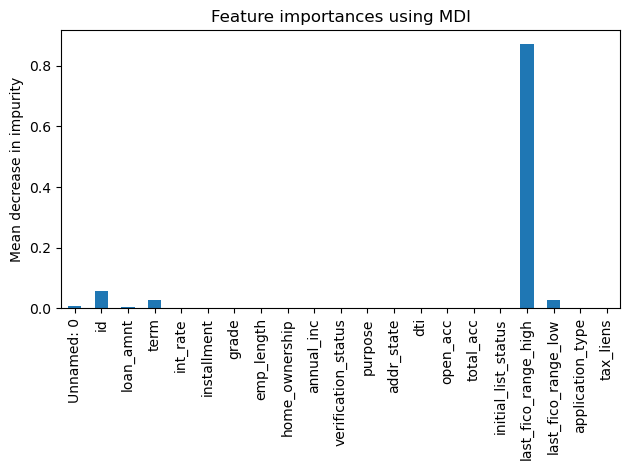

In [72]:
importances = DT1.feature_importances_

tree_importances = pd.Series(importances, index=names)
#std = np.std([DT1.feature_importances_ for DT1 in DT1.estimators_], axis=0)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Looking at the bar chart of feature importance, we see that the d=tree is using the `id` feature. In reality this column has no information about whether a loan will be paid. So therefore we now remove this column from `df` and see how this changes the tree.

In [73]:
X = X.drop('id', axis=1)
X = X.drop(X.columns[[0]], axis=1)  

In [74]:
X

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,2500.0,0,17.27,89.47,3,1,1,50000.0,2,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,7200.0,0,17.27,257.67,3,9,4,20000.0,2,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,16000.0,0,10.78,522.16,1,5,5,63000.0,0,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,16000.0,0,5.32,481.84,0,8,1,96000.0,0,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,13000.0,1,16.59,320.23,3,10,5,40000.0,2,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,12000.0,0,13.99,410.08,2,0,5,47000.0,1,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,25000.0,1,25.69,743.94,5,6,1,70000.0,2,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,16000.0,0,12.79,537.49,2,1,4,48000.0,0,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,35000.0,1,15.59,843.53,2,1,1,180000.0,2,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Now that we have removed the columns that don't hold any informative data, we refit the tree on the training data and look at wha the new decision boundaries are based upon.

In [76]:
DT5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, splitter = 'best', min_samples_split = 4, min_samples_leaf = 1, max_features = 19)

In [77]:
DT5 = DT5.fit(X_train, y_train)

In [78]:
y5_hat = DT5.predict(X_test)

In [79]:
cal_accuracy(y_test, y5_hat)

Accuracy :  89.23430321592649
Report :                precision    recall  f1-score   support

           0       0.75      0.76      0.76      1436
           1       0.93      0.93      0.93      5094

    accuracy                           0.89      6530
   macro avg       0.84      0.85      0.84      6530
weighted avg       0.89      0.89      0.89      6530



Now to look at the new feature importance.

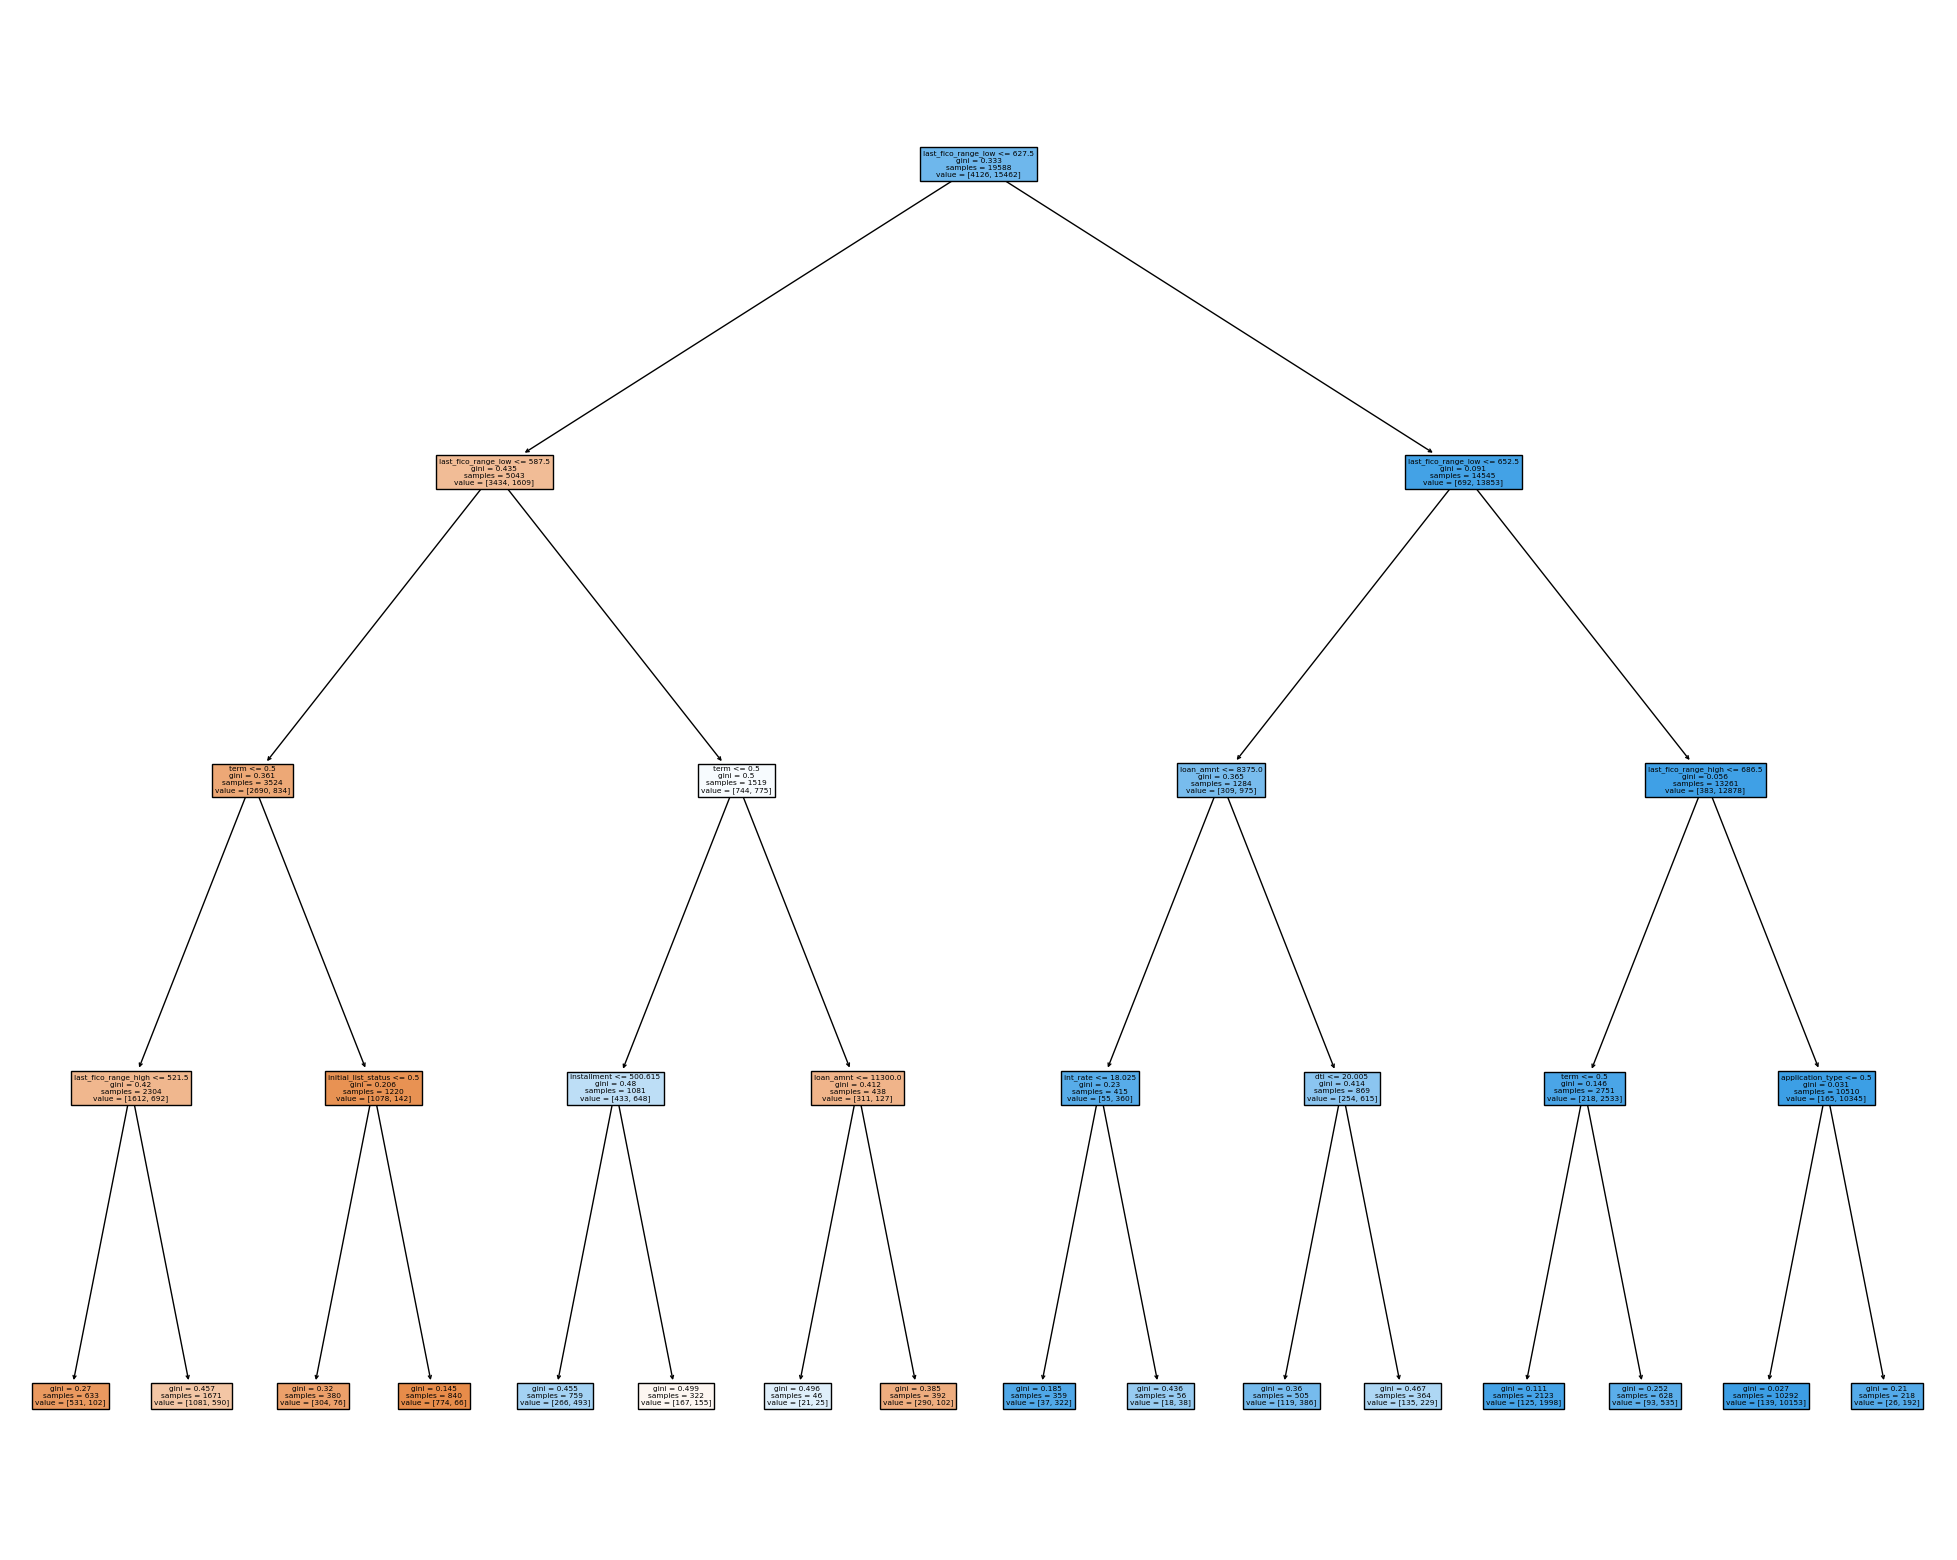

In [80]:
from sklearn import tree
names = X.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT5,
                   feature_names=names,
                   filled=True)

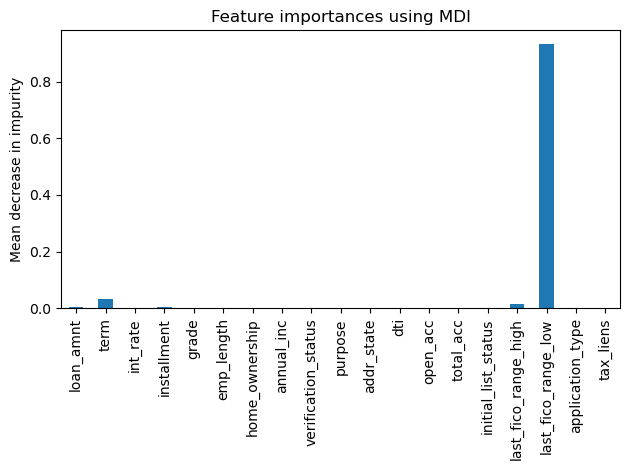

In [81]:
importances = DT5.feature_importances_

tree_importances = pd.Series(importances, index=names)


fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Now that we have removed the irrevlevant columns, we can see the features that the model relies on most heavily is the fico range and the term length of the loan, (`last_fico_range_low`, `last_fico_range_high`,`term`). These features make more sense when trying to decide if a loan is going to be paid back. We will adopt this new tree as our 'best model' so far. So now it only leaves for us to to look at the final confusion matrix and ROC curve before we look towards combining this tree with the other models to hopefully create an even stronger model via stacking.

## Confusion Matrix

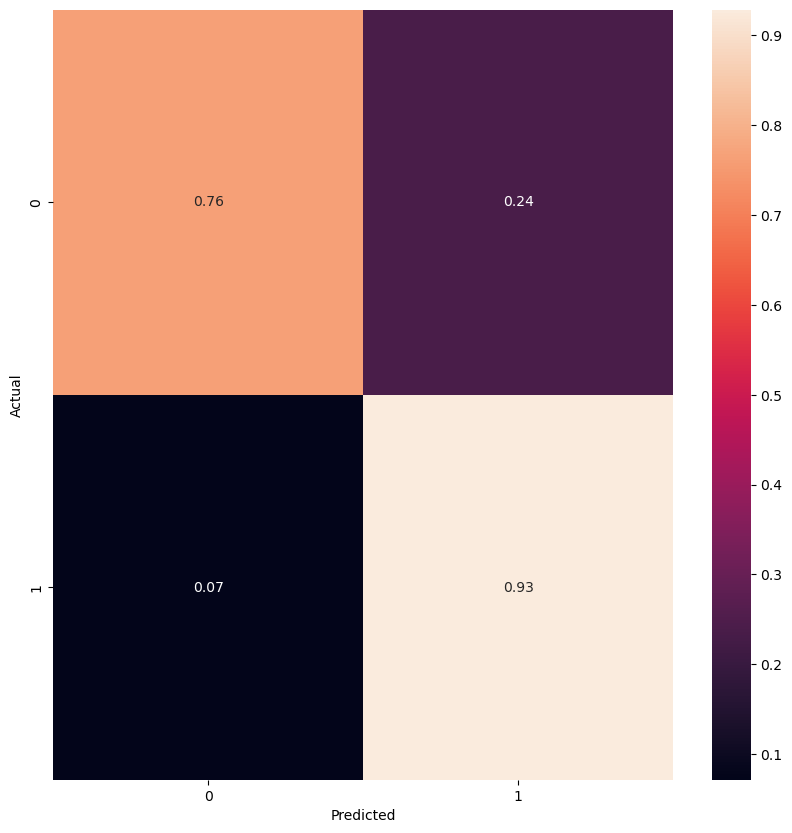

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm5 = confusion_matrix(y_test, y5_hat)
# Normalise
cmn5 = cm5.astype('float') / cm5.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn5, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

We see the model is getting very few false negatives, and caching around 76% of the actual negative points (where loans will nopt be paid back). This is quite good, although it means when the model says something will be a safe investment 24% of the time it will be wrong. Anyone using this model to make a decision should bear this in mind as they may prefer to be more cautious than this.

## Final ROC curve comparison of all decision tree models

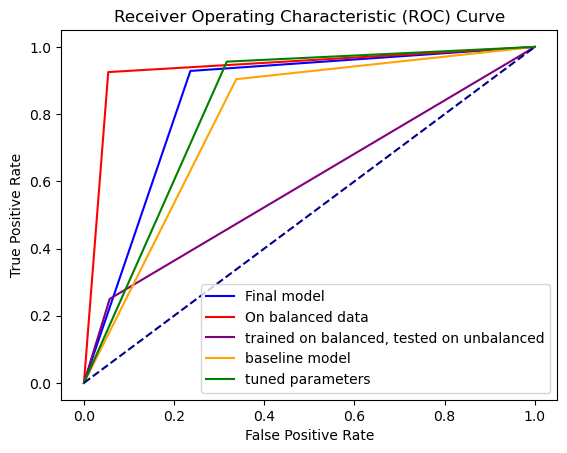

In [84]:
# printing an ROC curve

# Calculate true positive rate and false positive rate
fpr5, tpr5, _ = metrics.roc_curve(y_test, y5_hat)
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)
fpr2, tpr2, _ = metrics.roc_curve(y_bal_test, y2_hat)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y3_hat)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y1_hat)
# Plot the ROC curve
plt.plot(fpr5, tpr5, color='blue', label='Final model')
plt.plot(fpr2, tpr2, color='red', label='On balanced data')
plt.plot(fpr3, tpr3, color='purple', label='trained on balanced, tested on unbalanced')
plt.plot(fpr, tpr, color='orange', label='baseline model')
plt.plot(fpr1, tpr1, color='green', label='tuned parameters')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Looking at the ROC curve, we can see that although the tuned parameter model (green) has point where it identifies the most true positives, it becomes a trade-off with picking up more false positives. In this context a user is less likely to want too lose oney and so we would prefer a model with slightly lower false positive rate even if it means a lower true postivie rate. If we decide that the user of the model is super-risk averse we may want the model trained on the balanced data set, as they are then the least likely to lose money on a bad investment. However, the user would then also be missing ou on lots of good investments where there was the potential to make lots of money. Hence why we have decided to go with the final model (blue).